<a href="https://colab.research.google.com/github/aasrod/Crime_Reports_Statistical_Analysis/blob/main/Crime_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Analysis

In [ ]:
#Data science ex.1 part 2
#7th semester 2021
#interesting!!!

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy.stats import chi2_contingency 

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_2019 = pd.read_csv("/content/drive/My Drive/DS PD dataset/Crime_Data_2019.csv")
data_2018 = pd.read_csv("/content/drive/My Drive/DS PD dataset/Crime_Data_2018.csv")
data_2017 = pd.read_csv("/content/drive/My Drive/DS PD dataset/Crime_Data_2017.csv")
data_2016 = pd.read_csv("/content/drive/My Drive/DS PD dataset/Crime_Data_2016.csv")
data_2015 = pd.read_csv("/content/drive/My Drive/DS PD dataset/Crime_Data_2015.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data = pd.concat([data_2019, data_2018, data_2017, data_2016, data_2015])
len(data)

526385

In [ ]:
data.head(5)

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-20-023323,2020-04-16 21:27:00,2020-04-16 21:27:00,POSS CONT SUB-3RD DEGREE--DRUG UNSPECIFIED,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,4TH DIVISION,436,HIGHWAY / ROAD / ALLEY,S 4TH ST / W KINGSTON AVE ...,LOUISVILLE,40214,16997
1,80-20-023323,2020-04-16 21:27:00,2020-04-16 21:27:00,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-HEROIN,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,4TH DIVISION,436,HIGHWAY / ROAD / ALLEY,S 4TH ST / W KINGSTON AVE ...,LOUISVILLE,40214,16998
2,80-20-023863,2020-04-20 17:24:45,2020-04-18 01:42:45,TBUT OR DISP CONTENTS FROM VEH $500 OR > BUT <...,VEHICLE BREAK-IN/THEFT,23F,PART I,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,7400 BLOCK DIXIE HWY ...,LOUISVILLE,40258,16999
3,80-20-023139,2020-04-15 21:55:00,2020-04-15 21:26:00,TRAF IN MARIJUANA-LESS THAN 8 OZ-1ST OFFENSE,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,4TH DIVISION,412,HIGHWAY / ROAD / ALLEY,S JACKSON ST / E ST CATHERINE ST ...,LOUISVILLE,40203,17000
4,80-20-023139,2020-04-15 21:55:00,2020-04-15 21:26:00,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,4TH DIVISION,412,HIGHWAY / ROAD / ALLEY,S JACKSON ST / E ST CATHERINE ST ...,LOUISVILLE,40203,17001


In [ ]:
data.isnull().sum()

INCIDENT_NUMBER       0
DATE_REPORTED         0
DATE_OCCURED         17
UOR_DESC              0
CRIME_TYPE            0
NIBRS_CODE            0
UCR_HIERARCHY      9946
ATT_COMP            933
LMPD_DIVISION         0
LMPD_BEAT           418
PREMISE_TYPE        323
BLOCK_ADDRESS         0
CITY                525
ZIP_CODE           3041
ID                    0
dtype: int64

In [ ]:
data=data.dropna(axis=0, subset=['UCR_HIERARCHY', 'ZIP_CODE', 'ATT_COMP', 'LMPD_BEAT', 'PREMISE_TYPE', 'DATE_OCCURED','CITY'])
data.isnull().sum()

INCIDENT_NUMBER    0
DATE_REPORTED      0
DATE_OCCURED       0
UOR_DESC           0
CRIME_TYPE         0
NIBRS_CODE         0
UCR_HIERARCHY      0
ATT_COMP           0
LMPD_DIVISION      0
LMPD_BEAT          0
PREMISE_TYPE       0
BLOCK_ADDRESS      0
CITY               0
ZIP_CODE           0
ID                 0
dtype: int64

In [ ]:
len(data)

512979

In [ ]:
all = data
data = data.sample(n=100000)
data.DATE_OCCURED

34253     2016-05-20 23:00:00
24524         4/12/2018 21:00
152390    2020-01-03 16:07:25
39374     2017-05-28 14:28:00
29874     2020-06-28 00:00:00
                 ...         
166872    2020-02-04 10:56:00
69985     2016-09-01 02:00:00
29746     2015-10-20 08:00:00
55451         11/6/2018 15:30
30734     2020-07-04 12:48:00
Name: DATE_OCCURED, Length: 100000, dtype: object

In [ ]:
print("Crimes:" , set(data['CRIME_TYPE']))
len(set(data['CRIME_TYPE']))

Crimes: {'ARSON', 'VANDALISM', 'WEAPONS', 'DUI', 'DRUGS/ALCOHOL VIOLATIONS', 'FRAUD', 'SEX CRIMES', 'HOMICIDE', 'OTHER', 'VEHICLE BREAK-IN/THEFT', 'ASSAULT', 'THEFT/LARCENY', 'ROBBERY', 'DISTURBING THE PEACE', 'BURGLARY', 'MOTOR VEHICLE THEFT'}


16

In [ ]:
def try_parsing_date(text):
    for fmt in ('%Y-%m-%d %H:%M:%S', '%Y-%d-%m %H:%M:%S', '%Y/%m/%d %H:%M:%S', '%Y/%d/%m %H:%M:%S', '%Y.%m.%d %H:%M:%S', '%Y.%d.%m %H:%M:%S',
                '%Y-%m-%d %H:%M', '%Y-%d-%m %H:%M', '%Y/%m/%d %H:%M', '%Y/%d/%m %H:%M', '%Y.%m.%d %H:%M', '%Y.%d.%m %H:%M',
                '%m-%Y-%d %H:%M:%S', '%m-%d-%Y %H:%M:%S', '%m/%Y/%d %H:%M:%S', '%m/%d/%Y %H:%M:%S', '%m.%Y.%d %H:%M:%S', '%m.%d.%Y %H:%M:%S',
                '%m-%Y-%d %H:%M', '%m-%d-%Y %H:%M', '%m/%Y/%d %H:%M', '%m/%d/%Y %H:%M', '%m.%Y.%d %H:%M', '%m.%d.%Y %H:%M',
                '%d-%m-%Y %H:%M:%S', '%d-%Y-%m %H:%M:%S', '%d/%m/%Y %H:%M:%S', '%d/%Y/%m %H:%M:%S', '%d.%m.%Y %H:%M:%S', '%d.%Y.%m %H:%M:%S',
                '%d-%m-%Y %H:%M', '%d-%Y-%m %H:%M', '%d/%m/%Y %H:%M', '%d/%Y/%m %H:%M', '%d.%m.%Y %H:%M', '%d.%Y.%m %H:%M'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')
dy = []
dm = []
dt = []
for i in data['DATE_OCCURED']:
  dy.append(try_parsing_date(i).year)
  dm.append(try_parsing_date(i).month)
  dt.append(try_parsing_date(i).time())

data['YEAR_occ'] = dy
data['MONTH_occ'] = dm
data['TIME_occ'] = dt

In [ ]:
data['YEAR_occ'].value_counts()

2016    16059
2017    15644
2015    15196
2018    15143
2019    13776
2020    13342
2021    10295
2014      324
2013       53
2012       34
2010       21
2008       19
2011       18
2009       17
2006       11
2007       10
2001        6
2005        5
2004        5
2003        5
2000        4
2002        3
1996        2
1994        2
1997        1
1980        1
1998        1
1979        1
1973        1
1988        1
Name: YEAR_occ, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


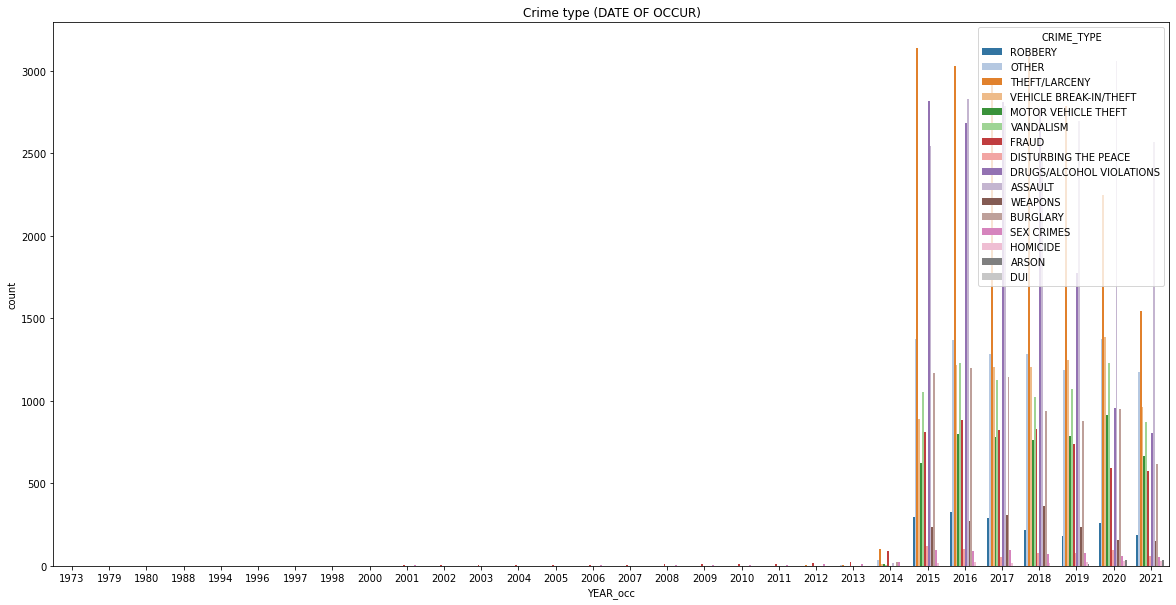

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crime type (DATE OF OCCUR)")
sns.countplot(data.YEAR_occ, hue=data.CRIME_TYPE, palette="tab20")
fig = plt.gcf()
plt.show()

In [ ]:
dy = []
dm = []
dt = []
for i in data['DATE_REPORTED']:
  dy.append(try_parsing_date(i).year)
  dm.append(try_parsing_date(i).month)
  dt.append(try_parsing_date(i).time())

data['YEAR_rep'] = dy
data['MONTH_rep'] = dm
data['TIME_rep'] = dt

In [ ]:
data.head(5)

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,YEAR_occ,MONTH_occ,TIME_occ,YEAR_rep,MONTH_rep,TIME_rep
34253,80-16-042989,2016-05-21 08:37:00,2016-05-20 23:00:00,ROBBERY - 1ST DEGREE,ROBBERY,120,PART I,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,10400 BLOCK VILLA DR ...,LOUISVILLE,40272,1009605,2016,5,23:00:00,2016,5,08:37:00
24524,80-18-027210,4/13/2018 14:36,4/12/2018 21:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,8TH DIVISION,811,RESIDENCE / HOME,11700 BLOCK CRONIN CT ...,LOUISVILLE,40245,947991,2018,4,21:00:00,2018,4,14:36:00
152390,80-20-000488,2020-01-03 19:22:25,2020-01-03 16:07:25,THEFT OF PROPERTY LOST/MISLAID/DELIVERED BY MI...,THEFT/LARCENY,23H,PART I,COMPLETED,3RD DIVISION,315,SERVICE / GAS STATION,10400 BLOCK DIXIE HWY ...,LOUISVILLE,40272,1247288,2020,1,16:07:25,2020,1,19:22:25
39374,80-17-043763,2017-05-31 14:28:00,2017-05-28 14:28:00,TBUT OR DISP FROM BUILDING < $500,THEFT/LARCENY,23D,PART I,COMPLETED,7TH DIVISION,711,BAR / NIGHT CLUB,5400 BLOCK BARDSTOWN RD ...,LOUISVILLE,40291,1097548,2017,5,14:28:00,2017,5,14:28:00
29874,80-20-038298,2020-06-29 21:38:36,2020-06-28 00:00:00,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECAL,VEHICLE BREAK-IN/THEFT,23G,PART I,COMPLETED,2ND DIVISION,211,HIGHWAY / ROAD / ALLEY,0 BLOCK I 64 RAMP ...,LOUISVILLE,40212,415398,2020,6,00:00:00,2020,6,21:38:36


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


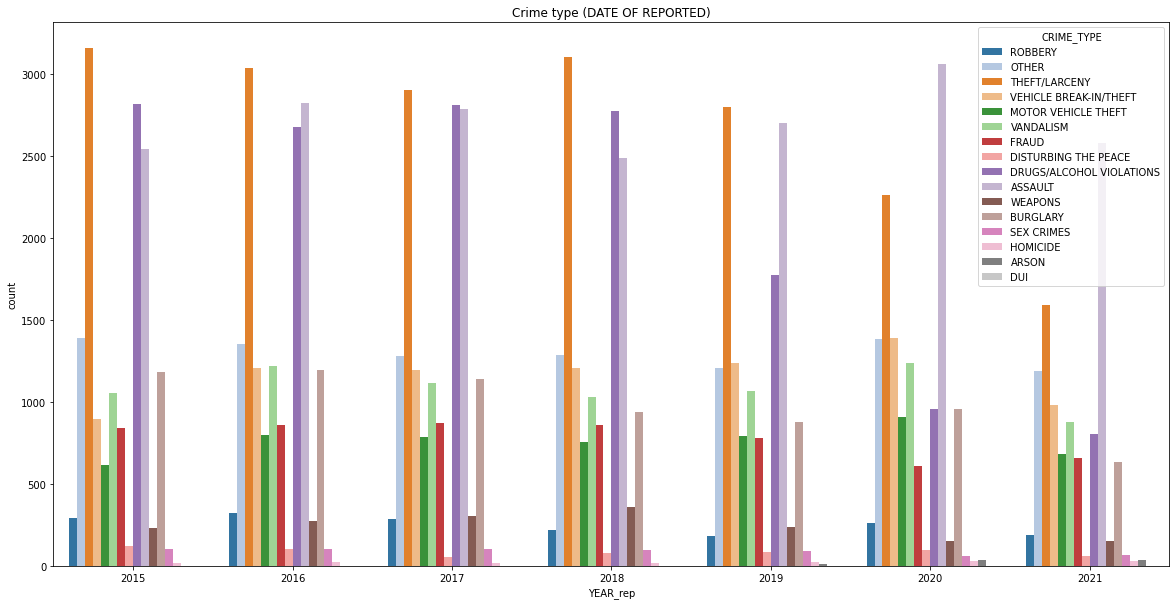

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crime type (DATE OF REPORTED)")
sns.countplot(data.YEAR_rep, hue=data.CRIME_TYPE, palette="tab20")
fig = plt.gcf()
plt.show()

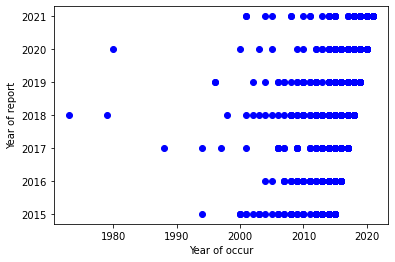

In [ ]:
x = np.array(data.YEAR_occ)
y = np.array(data.YEAR_rep)
plt.xlabel('Year of occur')
plt.ylabel('Year of report')
plt.plot(x, y, "bo")

In [ ]:
c=[]
for index, row in data.iterrows():
  if row.YEAR_rep > row.YEAR_occ:
    c.append(row.CRIME_TYPE)
set(c)

{'ASSAULT',
 'BURGLARY',
 'DISTURBING THE PEACE',
 'DRUGS/ALCOHOL VIOLATIONS',
 'FRAUD',
 'MOTOR VEHICLE THEFT',
 'OTHER',
 'ROBBERY',
 'SEX CRIMES',
 'THEFT/LARCENY',
 'VANDALISM',
 'VEHICLE BREAK-IN/THEFT',
 'WEAPONS'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


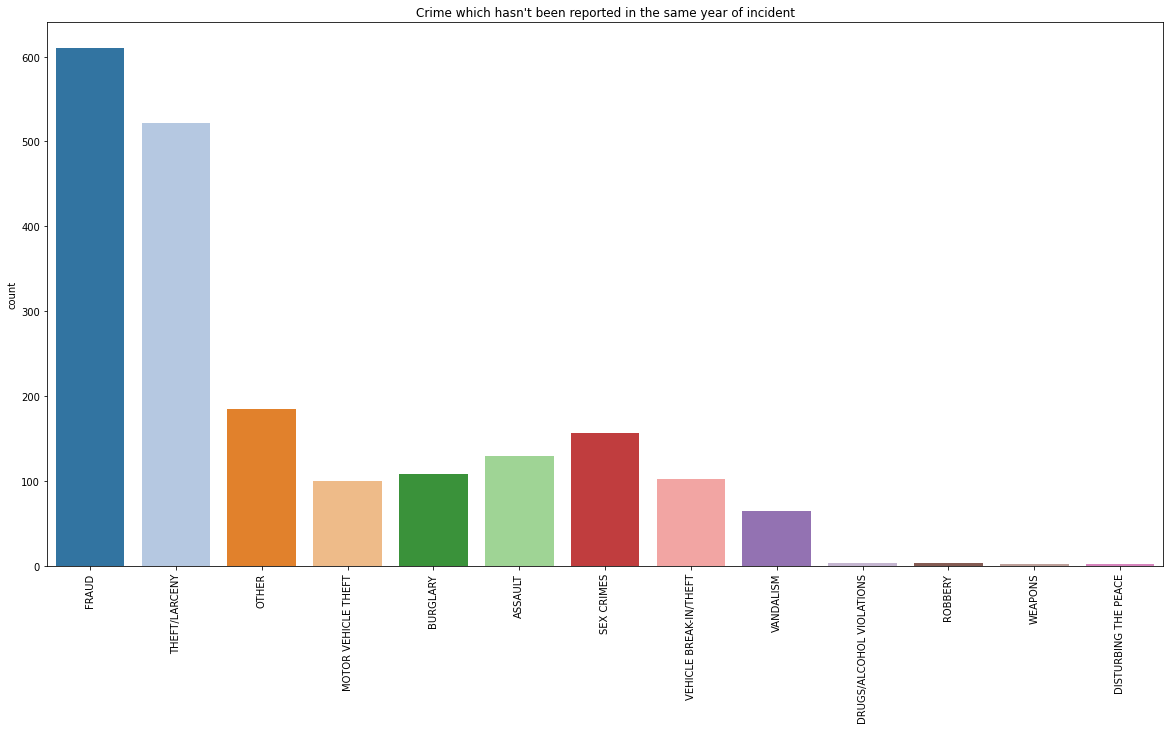

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crime which hasn't been reported in the same year of incident")
sns.countplot(c, palette="tab20")
plt.xticks(rotation=90)
fig = plt.gcf()
plt.show()

In [ ]:
#Crimes which were reported the same year of the incident.
t=[]
for i in set(data.CRIME_TYPE):
  if i not in set(c):
    t.append(i)
print(t)

['ARSON', 'DUI', 'HOMICIDE']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


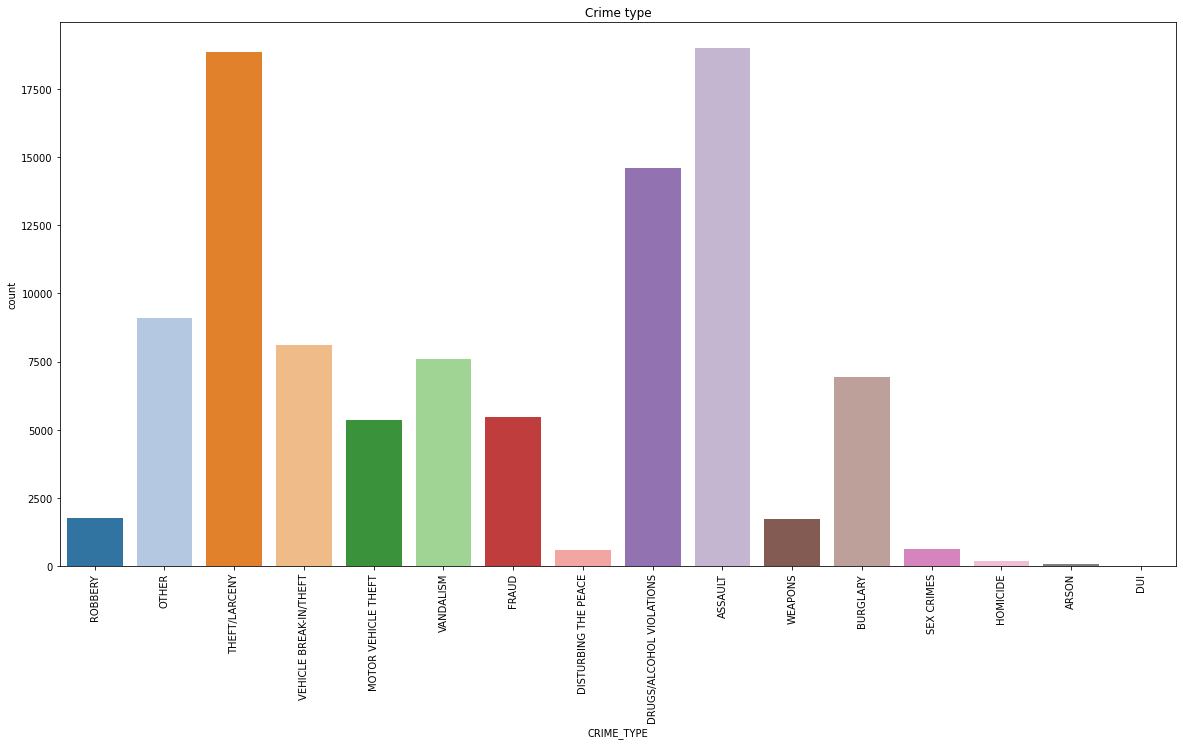

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crime type")
sns.countplot(data.CRIME_TYPE, palette="tab20")
fig = plt.gcf()
plt.xticks(rotation=90)
plt.show()

In [ ]:
data[data.CRIME_TYPE=='DUI'].CRIME_TYPE.value_counts()

DUI    7
Name: CRIME_TYPE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


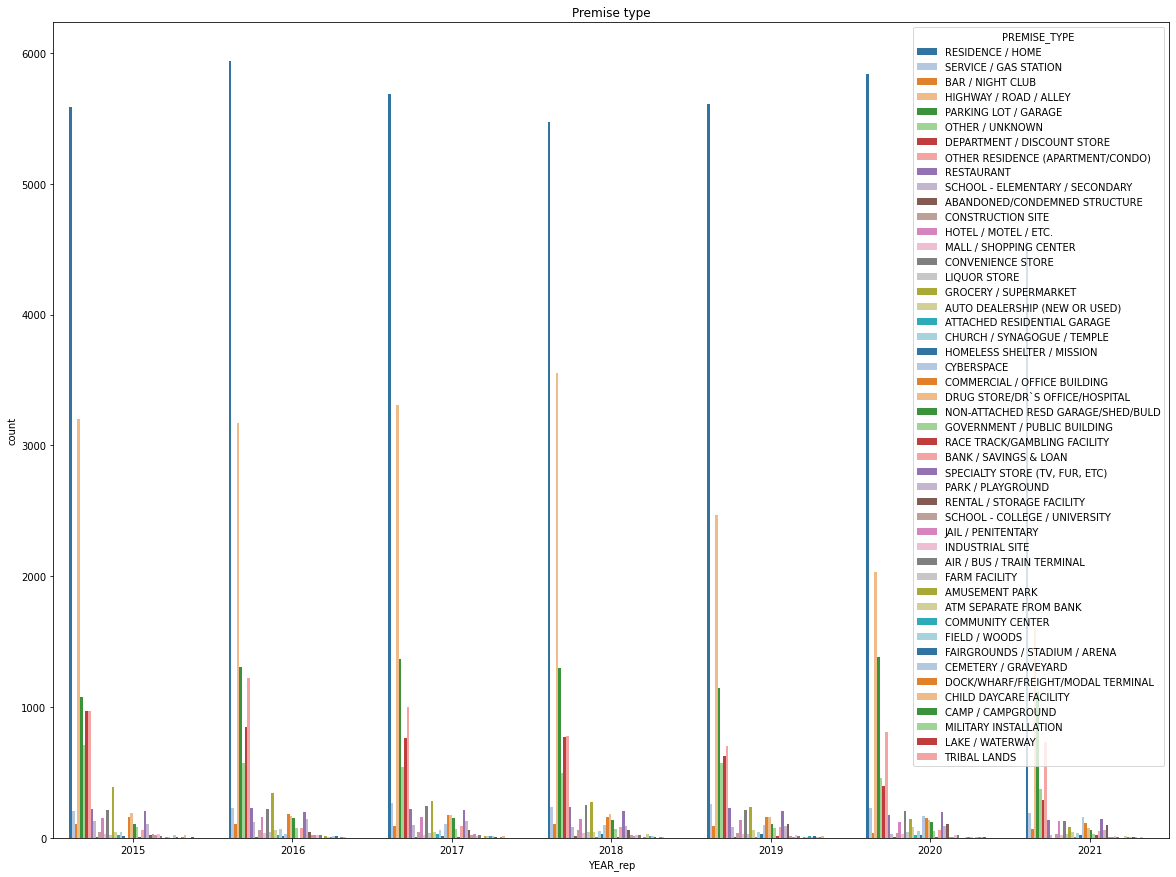

In [ ]:
plt.figure(figsize=(20,15))
plt.title("Premise type")
sns.countplot(data.YEAR_rep, hue=data.PREMISE_TYPE, palette="tab20")
fig = plt.gcf()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


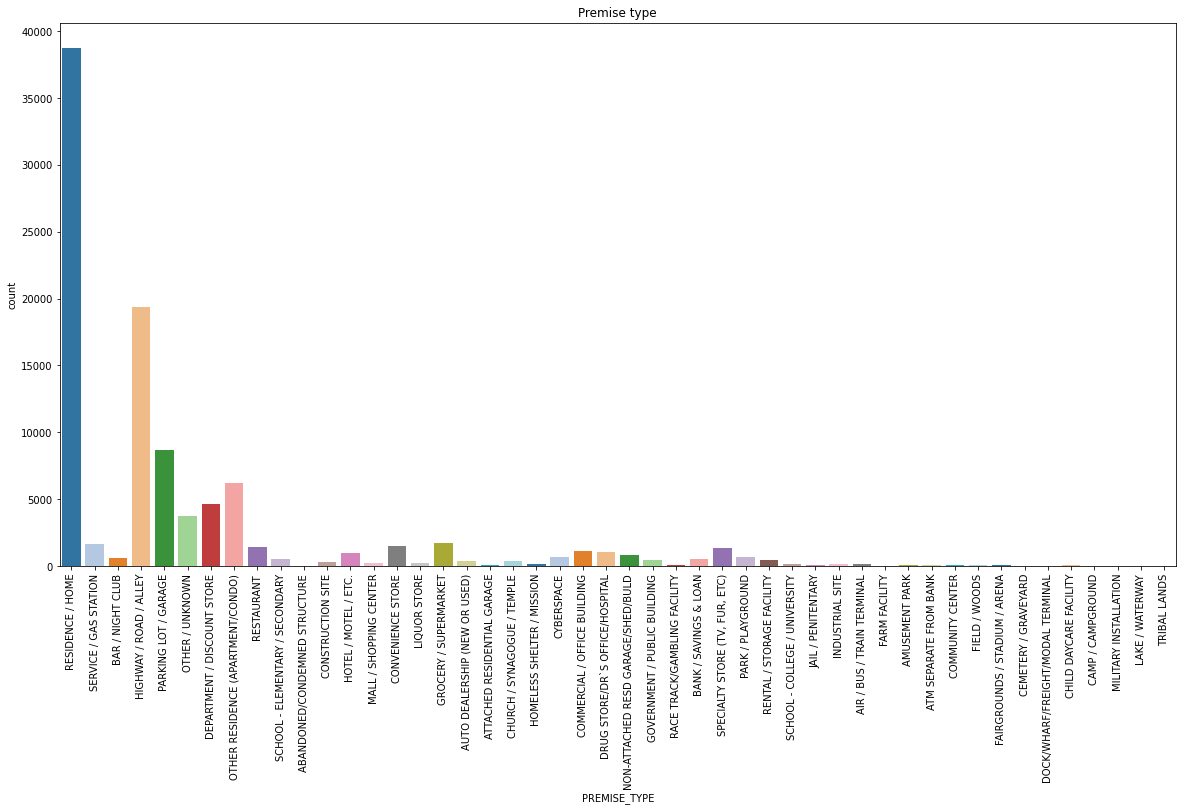

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Premise type")
sns.countplot(data.PREMISE_TYPE, palette="tab20")
fig = plt.gcf()
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


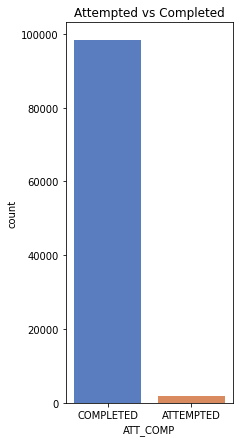

In [ ]:
plt.figure(figsize=(3,7))
plt.title("Attempted vs Completed")
sns.countplot(data.ATT_COMP, palette="muted")
fig = plt.gcf()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


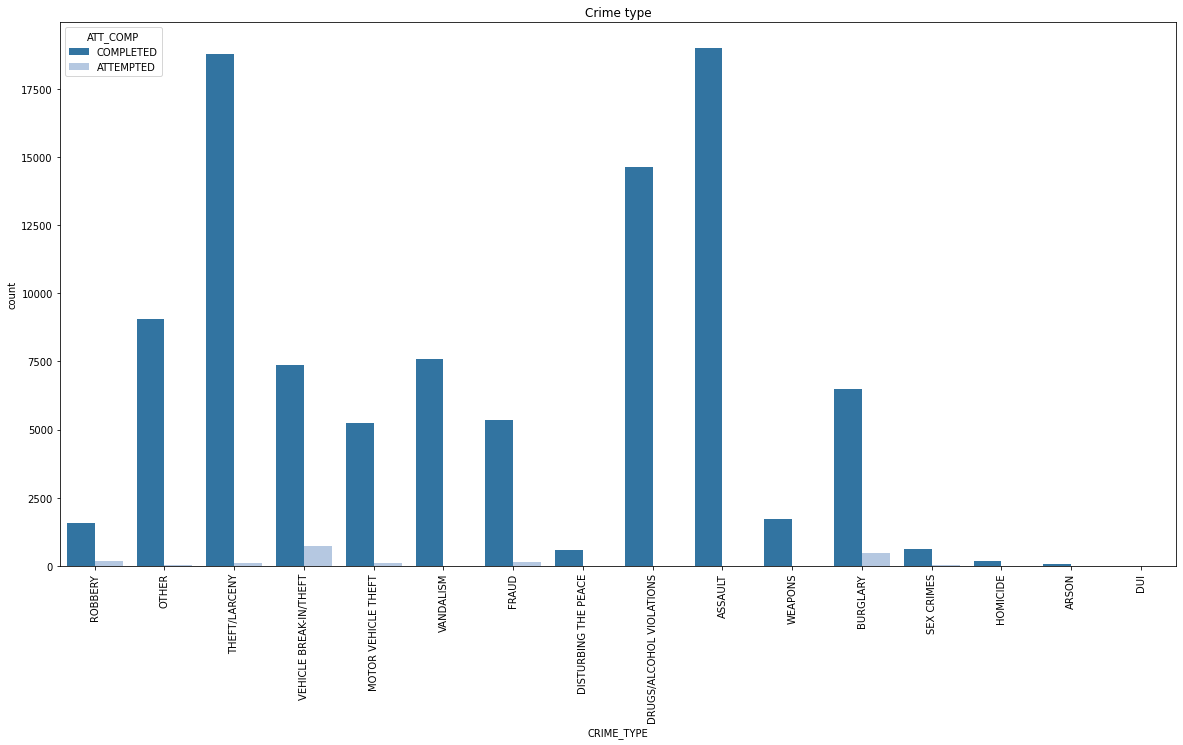

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crime type")
sns.countplot(data.CRIME_TYPE, hue=data.ATT_COMP, palette="tab20")
fig = plt.gcf()
plt.xticks(rotation=90)
plt.show()

In [ ]:
len(set(data['ZIP_CODE']))

86

In [ ]:
data.CRIME_TYPE.value_counts()

ASSAULT                     18997
THEFT/LARCENY               18863
DRUGS/ALCOHOL VIOLATIONS    14617
OTHER                        9091
VEHICLE BREAK-IN/THEFT       8113
VANDALISM                    7606
BURGLARY                     6927
FRAUD                        5479
MOTOR VEHICLE THEFT          5343
ROBBERY                      1760
WEAPONS                      1715
SEX CRIMES                    630
DISTURBING THE PEACE          600
HOMICIDE                      167
ARSON                          85
DUI                             7
Name: CRIME_TYPE, dtype: int64

In [ ]:
top_crimes = pd.DataFrame(data['ZIP_CODE'].value_counts())
pd.DataFrame(data['ZIP_CODE'].value_counts())
top_crimes = top_crimes[top_crimes['ZIP_CODE']> 2000]
top_crimes.reset_index(inplace=True)
top_crimes.rename(columns={'index':'ZIP_CODE', 'ZIP_CODE':'count'}, inplace=True)
top_crimes

,ZIP_CODE,count
0,40214,4638
1,40211,4284
2,40203,4181
3,40219,4045
4,40215,3397
5,40212,3267
6,40216,3040
7,40272,2921
8,40210,2918
9,40202,2755


In [ ]:
zc = pd.DataFrame(data[data['ZIP_CODE'].isin(top_crimes['ZIP_CODE'])])
zc.head(5)

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,YEAR_occ,MONTH_occ,TIME_occ,YEAR_rep,MONTH_rep,TIME_rep
34253,80-16-042989,2016-05-21 08:37:00,2016-05-20 23:00:00,ROBBERY - 1ST DEGREE,ROBBERY,120,PART I,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,10400 BLOCK VILLA DR ...,LOUISVILLE,40272,1009605,2016,5,23:00:00,2016,5,08:37:00
29874,80-20-038298,2020-06-29 21:38:36,2020-06-28 00:00:00,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECAL,VEHICLE BREAK-IN/THEFT,23G,PART I,COMPLETED,2ND DIVISION,211,HIGHWAY / ROAD / ALLEY,0 BLOCK I 64 RAMP ...,LOUISVILLE,40212,415398,2020,6,00:00:00,2020,6,21:38:36
21052,80-18-042913,6/7/2018 16:10,6/2/2018 6:30,"TBUT OR DISP AUTO > $500 BUT < $10,000",MOTOR VEHICLE THEFT,240,PART I,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,5500 BLOCK LAZY ACRES CT ...,LOUISVILLE,40258,851116,2018,6,06:30:00,2018,6,16:10:00
4717,80-18-003190,1/13/2018 10:07,1/13/2018 10:04,TBUT OR DISP FROM BUILDING < $500,FRAUD,270,PART II,ATTEMPTED,1ST DIVISION,111,RESIDENCE / HOME,500 BLOCK N 17TH ST ...,LOUISVILLE,40203,552409,2018,1,10:04:00,2018,1,10:07:00
45437,80-16-030193,2016-04-11 14:57:00,2016-04-10 21:00:00,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,7300 BLOCK FEYHURST DR ...,LOUISVILLE,40258,1016949,2016,4,21:00:00,2016,4,14:57:00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


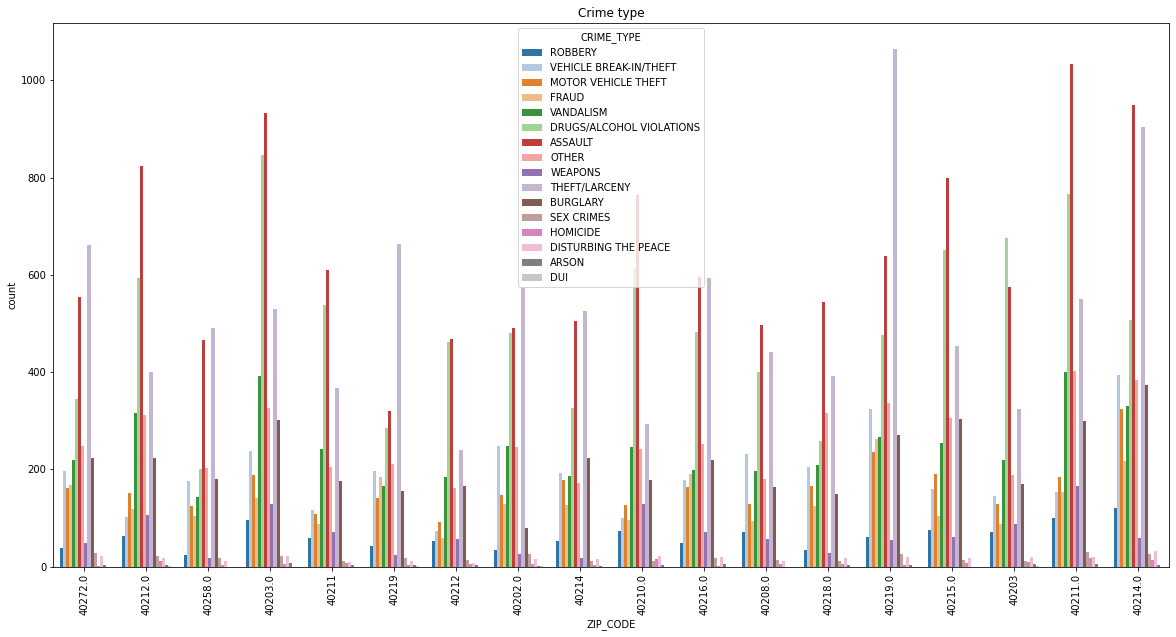

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crime type")
sns.countplot(zc.ZIP_CODE, hue=zc.CRIME_TYPE, palette="tab20")
fig = plt.gcf()
plt.xticks(rotation=90)
plt.show()

In [ ]:
#PREMISE_TYPE vs WEAPONS
d = pd.crosstab(data.PREMISE_TYPE, data.CRIME_TYPE, margins=True)
d = d[d.WEAPONS > 0]
d = d.WEAPONS
print(d)

PREMISE_TYPE
ABANDONED/CONDEMNED STRUCTURE           1
AIR / BUS / TRAIN TERMINAL              1
BAR / NIGHT CLUB                        5
CHURCH / SYNAGOGUE / TEMPLE             3
COMMERCIAL / OFFICE BUILDING            3
CONVENIENCE STORE                       5
DEPARTMENT / DISCOUNT STORE            16
DOCK/WHARF/FREIGHT/MODAL TERMINAL       1
DRUG STORE/DR`S OFFICE/HOSPITAL         3
FIELD / WOODS                           2
GOVERNMENT / PUBLIC BUILDING            3
GROCERY / SUPERMARKET                   9
HIGHWAY / ROAD / ALLEY               1019
HOTEL / MOTEL / ETC.                   14
JAIL / PENITENTARY                      1
LIQUOR STORE                            3
OTHER / UNKNOWN                        51
OTHER RESIDENCE (APARTMENT/CONDO)      63
PARK / PLAYGROUND                      18
PARKING LOT / GARAGE                   90
RACE TRACK/GAMBLING FACILITY            2
RENTAL / STORAGE FACILITY               3
RESIDENCE / HOME                      347
RESTAURANT           

In [ ]:
#MONTH_occ and count of ROBBERY and BURGLARY
chisqt = pd.crosstab(data.MONTH_occ, data.CRIME_TYPE, margins=True)
chisqt = pd.DataFrame(chisqt,columns=['ROBBERY',  'BURGLARY'])
print(chisqt)

           ROBBERY  BURGLARY
MONTH_occ                   
1              164       595
2              117       473
3              118       521
4              126       562
5              176       675
6              167       661
7              159       639
8              167       649
9              159       571
10             144       594
11             124       478
12             139       509
All           1760      6927


In [ ]:
value = np.array([chisqt.iloc[0][0:2],
                  chisqt.iloc[1][0:2],
                  chisqt.iloc[2][0:2],
                  chisqt.iloc[3][0:2],
                  chisqt.iloc[4][0:2],
                  chisqt.iloc[5][0:2],
                  chisqt.iloc[6][0:2],
                  chisqt.iloc[7][0:2],
                  chisqt.iloc[8][0:2],
                  chisqt.iloc[9][0:2],
                  chisqt.iloc[10][0:2],
                  chisqt.iloc[11][0:2]])

chi_val, p_val, dof, expected = chi2_contingency(value)
print('The statistical value: %.3f & the p-value: %.3f & the degree of freedom are: %.0f' % (chi_val, p_val, dof))

The statistical value: 5.892 & the p-value: 0.880 & the degree of freedom are: 11
